### 의사결정나무(Decision Tree)

- 일련의 독립변수들을 활용하여 분류를 하거나 예측을 수행하는 기법
- 최종 결과물이 "일련의 규칙들"로 표현됨
- 1) 반복적 분할(Recursive partitioning)
    - ① 레코드들을 두 부분으로 반복해서 잘라 세분된 영역 내의 동질성이 최대가 되도록 함
    - ② 계속 잘라나가다 보면 모든 학습용 데이터를 100% 정확하게 분류해 낼 수 있을 만큼 세분화 해 나갈 수 있음
- 2) 분류나무의 가지치기(Pruning the tree)
    - ① 반복적 분할을 반복하다 보면 과적합화는 피할 수 없이 나타나게 됨
    - ② 과적합화를 피하기 위해 불필요한 가지(정보 제공이 그리 많지 않은 가지)를 제거함으로써 나무를 단순화하는 작업이 이루어지게 됨
- 단점: 과적합화
- 과적합화 해소방법
    - ① 가지치기 : 적당한 수준에서 나무의 성장을 중단시킴
    - ② 랜덤 포레스트

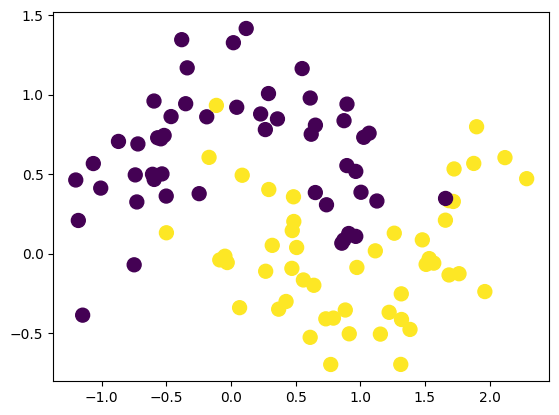

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# noise 표준편차
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [10]:
from sklearn.tree import DecisionTreeClassifier

# criterion(entropy,gini)

model = DecisionTreeClassifier(random_state=2,criterion='entropy')
# model = DecisionTreeClassifier(random_state=2,max_depth=3,criterion='entropy')
model.fit(X_train, y_train)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 1.0
검증용: 0.92


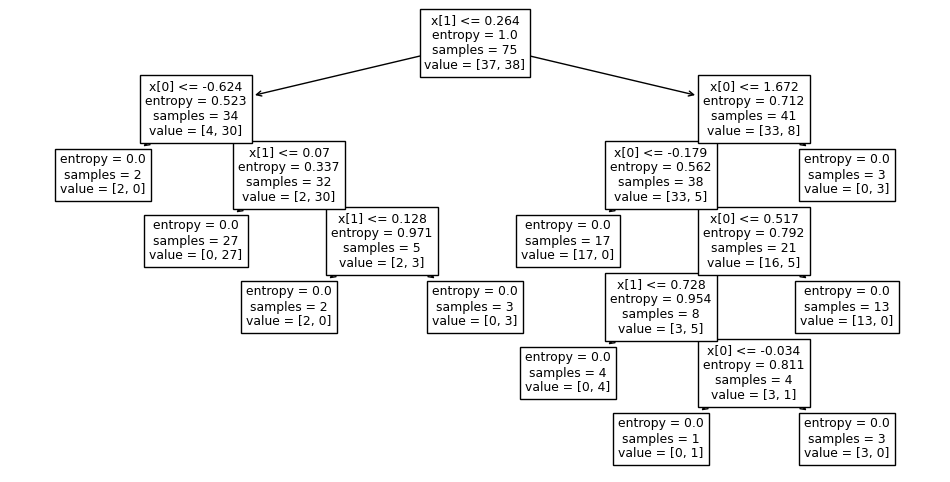

In [11]:
from sklearn import tree

plt.figure(figsize=(12,6))
tree.plot_tree(model)
plt.show()

동전 던지기를 했는데 앞뒤면이 반반씩 나온다면 불확실성 최대, 한면만 계속 나온다면 순도 최대

#### 엔트로피 
- A 영역에 속한 모든 샘플이 동일한 범주에 속할 경우(불확실성 최소, 순도 최대) = 엔트로피 0
- 반반씩 섞여 있을 경우(불확실성 최대, 순도 최소) = 엔트로피 1

#### gini index(지니 계수) 
- 0.0~0.5의 값, 작을수록 분류가 잘된 것(0이면 불확실성 최소, 순도 최대)
- 0.5이면 불확실성 최대, 순도 최소

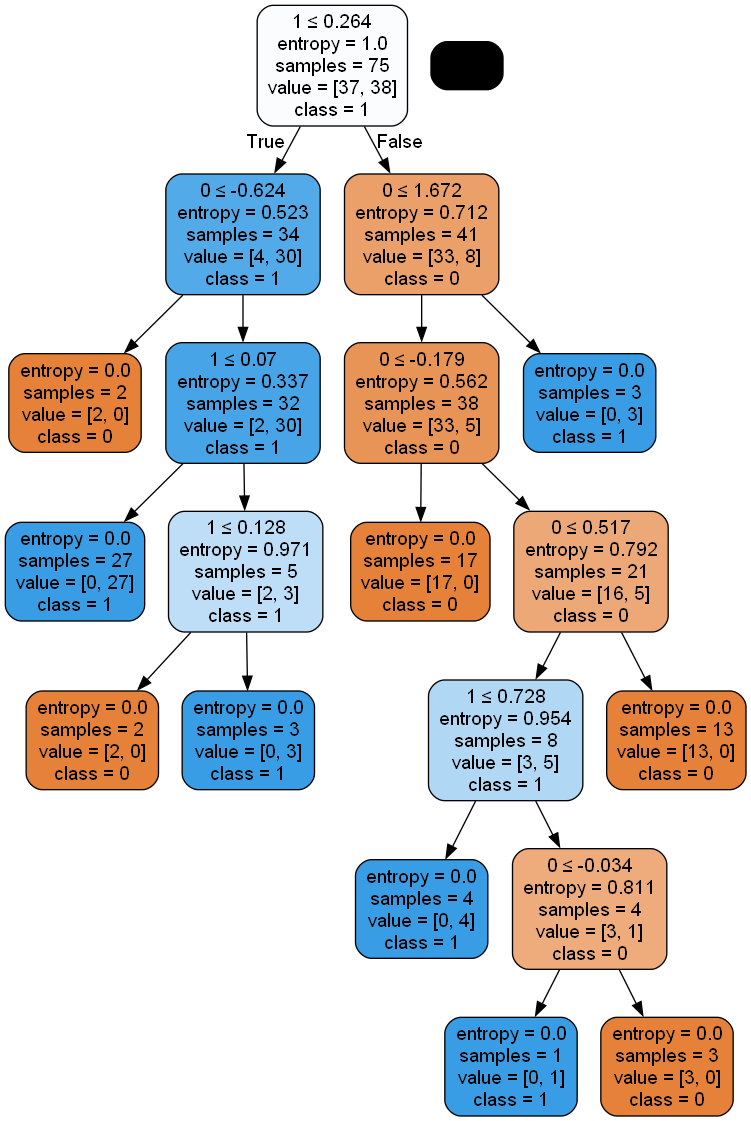

In [12]:
# graphviz exe 설치(path 추가 옵션 선택)

from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
dot_data = export_graphviz(model, out_file=None, feature_names=[0,1], class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

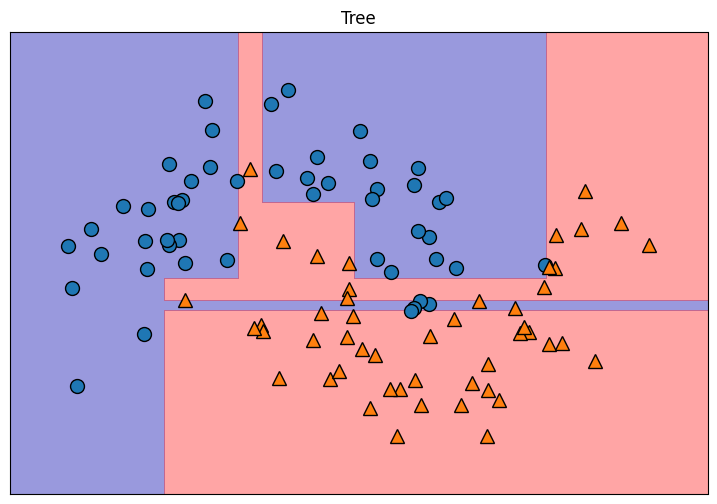

In [13]:
# 에러가 발생할 경우 
# pip install joblib==1.1.0
import matplotlib.pyplot as plt
import mglearn

plt.figure(figsize=(9,6))
plt.title("Tree")

#클래스 구분면
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.4)

#산점도
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [18]:
## max_depth = 3으로 둘 경우

from sklearn.tree import DecisionTreeClassifier

# criterion(entropy,gini)

model = DecisionTreeClassifier(random_state=2,max_depth=3,criterion='gini')
model.fit(X_train, y_train)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.9066666666666666
검증용: 0.92


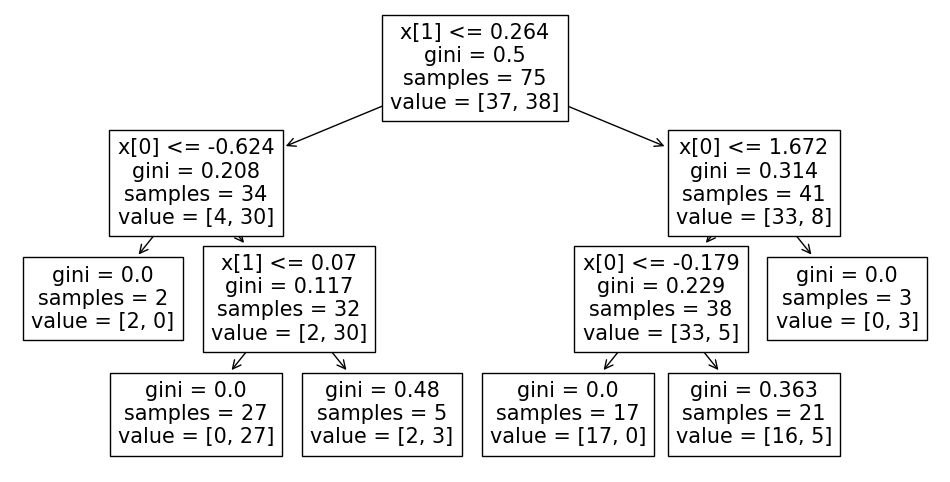

In [19]:
from sklearn import tree

plt.figure(figsize=(12,6))
tree.plot_tree(model)
plt.show()

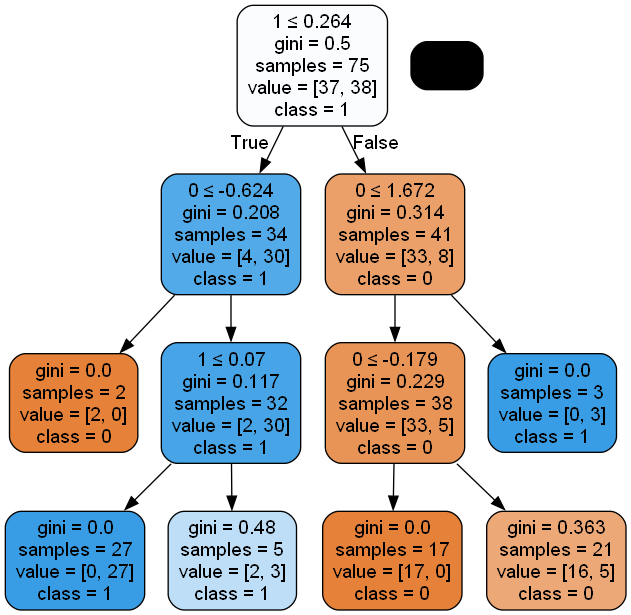

In [20]:
# graphviz exe 설치(path 추가 옵션 선택)

from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
dot_data = export_graphviz(model, out_file=None, feature_names=[0,1], class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

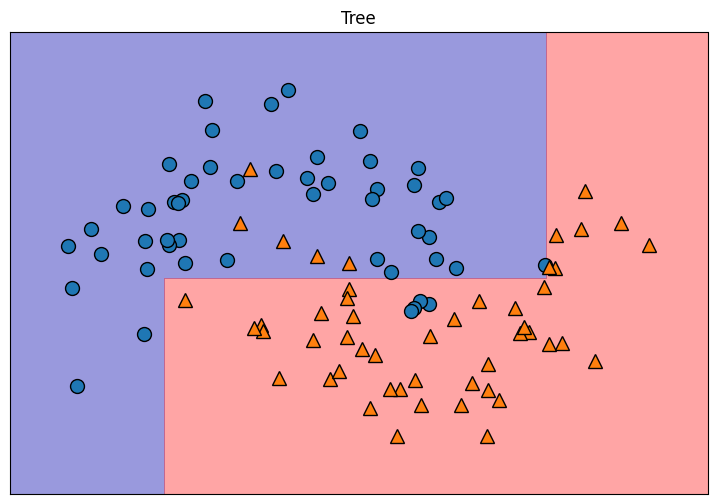

In [21]:
# 에러가 발생할 경우 
# pip install joblib==1.1.0
import matplotlib.pyplot as plt
import mglearn

plt.figure(figsize=(9,6))
plt.title("Tree")

#클래스 구분면
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.4)

#산점도
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)